### Import Library

In [2]:
# For data manipulation
import pandas as pd
import numpy as np 

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns 

# For data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# For data modeling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

### Load dataset

In [3]:
df = pd.read_csv('assets/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [22]:
df = df.drop(['region'], axis=1)

In [24]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


### Data Preprocessing

In [21]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Encoding categorical data

In [8]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])

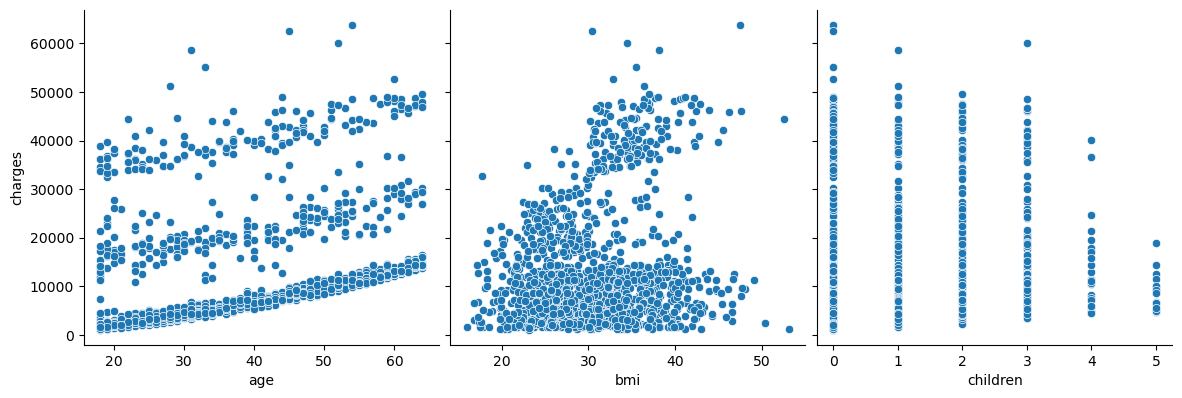

In [19]:
sns.pairplot(df, x_vars=['age', 'bmi', 'children'], y_vars='charges', height=4, aspect=1, kind='scatter')

<Axes: >

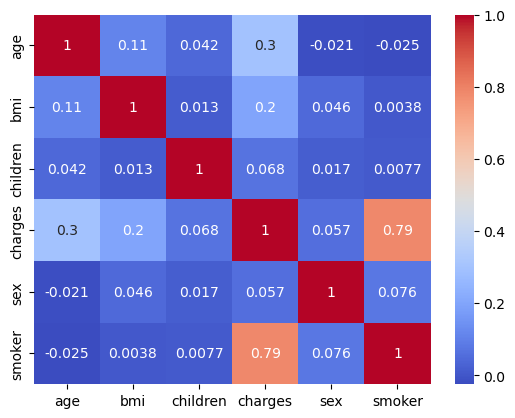

In [10]:
corr = df[['age', 'bmi', 'children', 'charges', 'sex', 'smoker']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

### Feature scalling

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [12]:
x = df[['age', 'sex', 'bmi', 'children', 'smoker']]
y = df['charges']

### Split data

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Feature scalling

In [14]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Modelling

In [15]:
svr_model = SVR(kernel='rbf')
svr_model.fit(x_train_scaled, y_train)

SVR()

### Predict test data

In [16]:
y_pred = svr_model.predict(x_test_scaled)

### Evaluate model

In [17]:
mse = mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'MSE Score : {mse}')
print(f'R2 Score : {r2_score}')
print(f'MAE Score : {mae}')

MSE Score : 174844168.0728127
R2 Score : -0.0987507664890721
MAE Score : 8563.845604154736


### Visualize model

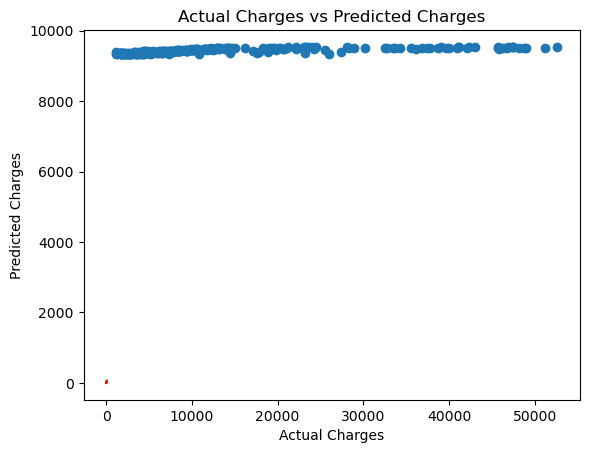

In [18]:
plt.scatter(y_test, y_pred)
plt.plot([x_test.min(), x_test.max()], [x_test.min(), x_test.max()], 'r')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual Charges vs Predicted Charges')
plt.show()